# NYC Taxi Operations Analysis from TLC Data
---

# **Overview**
New York City Taxi and Limousine Commission (TLC) is the agency responsible
for licensing and regulating New York City's medallion (yellow) taxis, street hail livery (green) taxis,
for-hire vehicles (FHVs), commuter vans, and paratransit vehicles.

The Taxi and Limousine Commission (TLC) regulates how much a cab can charge per mile or per minute, determines a cab company's leasing fees for drivers, monitors routes taken by the drivers (to ensure they are not artificially inflating the price), and much more. In essence, a cab company (or a cab driver) can only make as much money as the government allows them to make.

The taxis in New York are operating in NYC area which divided by 5 borough:
1. 'Manhattan'
2. 'Brooklyn'
3. 'Queens', 
4. 'Bronx',
5. 'Staten Island']

**What is a Borough?**
Boroughs (pronounced burrow) are formal subdivisions of cities that have some aspects of self-government.

<img src="https://freetoursbyfoot.com/wp-content/uploads/2022/12/5-boroughs.png" width="50%" height="50%">


The TLC collects trip record
information for each taxi and for-hire vehicle trip completed by our licensed drivers and vehicles.
We receive taxi trip data from the technology service providers (TSPs) that provide electronic
metering in each cab, **this data will be the base of our dataset** in our analysis.

*Source: https://www.investopedia.com/articles/professionals/092515/how-nycs-yellow-cab-works-and-makes-money.asp*

## **Stakeholder Statement**

Taxi companies may be interested in understanding demand patterns, identifying popular pickup/drop-off locations, and pricing strategies to maximize revenue. They may also want to improve service quality and efficiency based on customer behavior analysis.

## **Goals Setting & Problem Statement**

This project analysis generally aims to provide insights on the day-to-day operations of NYC taxi, 
    
    1. How to optimize revenues and streamlining operations?  
   
    2. How to to better serve customers by undertanding their behaviours?  
   
    3. How to optimize the distribution of drivers?


## Data Understanding
---
## **Dataset: NYC TLC Taxi Trip Data**

The taxi dataset used in this project is yellow taxi trip data, which records attributes such as pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. Yellow taxis are taxis that allowed to respond to street hailed from a passenger in all five boroughs.



### NYC TLC Taxi Trip Data

| Columns       | Description |  Notes| 
| :---          |    :----   | :---- | 
| 'VendorID'    | LPEP provider that provided the record.|  |
| 'lpep_pickup_datetime',   | Starting time from taxi meter
| 'lpep_dropoff_datetime',  | Ending time from taxi meter
| 'store_and_fwd_flag',     | Trip record are saved and send after signal received | Y= store n forwad N=Not store n forward  
| 'RatecodeID',             | The final rate code in effect at the end of the trip.   *There are different rates for different type of trips & airport destination.*|  1=Standard rate, 2=JFK (Airport rate), 3=Newark   (Newark Country), 4=Nassau or Westchester (County), 5=Negotiated fare , 6=Group ride|
| 'PULocationID',           | Pickup location, using Taxi Zone code
| 'DOLocationID',           | Dropoff location, using Taxi Zone code
| 'passenger_count',        | # of passengers, driver manually input, max 6 by law
| 'trip_distance',          | Distance per trip, in miles
| 'fare_amount',            | The time and distance fare is calculated by the meter. includes the $0.50 and $1 rush hour and overnight charges
| 'extra',                  | only includes the $0.50 and $1 rush hour and overnight charges.
| 'mta_tax',                | $0.50 MTA tax that is automatically triggered based on the metered rate in use.
| 'tip_amount',             | tips from customers, tips from customers with CC payment
| 'tolls_amount',           | tolls fare amount
| 'ehail_fee',              | - | unidentified, all nulls  **[TO BE DROPPED]** |
| 'improvement_surcharge',  | $0.30 improvement surcharge assessed on hailed trips at the flag drop.
| 'total_amount',           | The total amount charged to passengers. Does not include cash tips.
| 'payment_type',           | 1 = Credit card 2 = Cash 3 = No charge 4 = Dispute 5 = Unknown 6 = Voided trip
| 'trip_type',              | 1 = Street|hail (inside the city) 2 = Dispatch (outside city)
| 'congestion_surcharge'    | surcharge for traffic congestion

---


**ADDITIONAL Dataset: Taxi Zone Dataset**

The pick-up and drop-off locations are populated by numbers ranging from 1 to 263. These numbers corresponds to taxi zone.

• Taxi Zone Shapefile: contains geometric information of each taxi zones.

• Taxi Zone Look Up Table: a table that contains a list of TLC taxi zone location IDs, location names, and corresponding boroughs of each zone.

Obtained from: https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf


# 1. Data Preparation: Reading & Load Data

In [54]:
#Import relevant library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#Set display columns to accomodate all columns
pd.options.display.max_columns = 100

In [56]:
#Loading Data

df = pd.read_csv('/Users/Dwika/My Projects/Modul 2 Purwadhika/_CAPSTONE Project Modul 2/Dataset/Provided Dataset/NYC TLC Trip Record.csv')

/var/folders/hp/56vw0j_10t7b71dy17hxntmh0000gp/T/ipykernel_79278/3186602132.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/Dwika/My Projects/Modul 2 Purwadhika/_CAPSTONE Project Modul 2/Dataset/Provided Dataset/NYC TLC Trip Record.csv')


In [57]:
#Data preview
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [58]:
#General info on data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [59]:
#Construct deep Info on columns & values:

NYCtaxi = []
for i in df.columns:
    NYCtaxi.append([i, df[i].dtypes,
                      df[i].isna().sum(),
                      round((((df[i].isna().sum())/(len(df)))*100),2), 
                    df[i].nunique(), 
                    df[i].sample(3).values])
pd.DataFrame(NYCtaxi, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,VendorID,int64,0,0.00,2,"[2, 2, 2]"
1,lpep_pickup_datetime,object,0,0.00,66575,"[2023-01-02 14:28:21, 2023-01-23 03:03:46, 202..."
2,lpep_dropoff_datetime,object,0,0.00,66519,"[2023-01-25 17:02:43, 2023-01-25 10:29:00, 202..."
3,store_and_fwd_flag,object,4324,6.34,2,"[N, N, N]"
4,RatecodeID,float64,4324,6.34,6,"[1.0, 1.0, 1.0]"
5,PULocationID,int64,0,0.00,226,"[75, 42, 75]"
6,DOLocationID,int64,0,0.00,249,"[130, 239, 92]"
7,passenger_count,float64,4324,6.34,10,"[1.0, 1.0, 1.0]"
8,trip_distance,float64,0,0.00,1870,"[1.86, 1.36, 6.12]"
9,fare_amount,float64,0,0.00,2553,"[19.8, 21.9, 8.6]"


> From deep data info, we need to prepare by cleaning the data before deep diving into analysis.
> Data in need of cleaning would be:
> - Duplicate values
> - Null / Missing Data
> - Extreme Outliers & Data Anomalies 

---

# 2. Data Cleaning

**Overview**:
- 2.1 Drop Duplicate rows 
- 2.2 Cleaning Null Values
    - 2.2.1 The missing values are contained on the same rows where columns are ['RatecodeID', 'passenger_count' , 'payment_type', 'trip_type', 'congestion_surcharge'].
    - 2.2.2 Dropping Rows with Null Values
    - 2.2.3 Dropping Unnecessary Columns
- 2.3 Cleaning Column Data Types
    - 2.3.1 Convert to Datetime
    - 2.3.2 Converting 'passenger_count' column from Float --> Integer
- 2.4 Cleaning up Data Anomalies
    - 2.4.1 Check for data abnormalities
    - 2.4.2 Checking rows with Fare data having negative values
    - 2.4.3 Checking 'passenger_count' having <1 or >7 values 
- 2.5 Analyze Outliers
    - 2.5.1 Initial analysis from descriptive stats
    - 2.5.2 Check Outliers on trip_distance
- 2.6 Reset Indexing

## 2.1 Dropping Duplicate Rows

In [60]:
#Check for duplicates --> CLEAR

df[df.duplicated()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


No duplicate rows

## 2.2 Cleaning Null Values

### 2.2.1 Checking Null values 

In [61]:
#Checking the amount of missing values
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

### Note on 'store_and_fwd_flag' Column

In [62]:
df[df['store_and_fwd_flag'].isna()].shape

(4324, 20)

**4324** Total missing values from the column 'store_and_fwd_flag'. 

Assuming the missing values are from the bug within 'store_and_fwd_flag' feature, which supposed to notify the system when no signal are available to update the data, **all missing values will are assumed to be device problem** (data are stored when no signal available, then forward later)

In [63]:
#Missing values based on VendorID

df[df['store_and_fwd_flag'].isna()]['VendorID'].value_counts(normalize=True)

VendorID
2    0.970398
1    0.029602
Name: proportion, dtype: float64

**97%** of the missing values are obtained from **TSP vendor 2**, which indicates that the metering devices are **less reliable**.

### 2.2.2 Dropping Rows with Null Values

In [64]:
#Percentage of missing values
round(df.isna().sum()/len(df)*100,2)

VendorID                   0.00
lpep_pickup_datetime       0.00
lpep_dropoff_datetime      0.00
store_and_fwd_flag         6.34
RatecodeID                 6.34
PULocationID               0.00
DOLocationID               0.00
passenger_count            6.34
trip_distance              0.00
fare_amount                0.00
extra                      0.00
mta_tax                    0.00
tip_amount                 0.00
tolls_amount               0.00
ehail_fee                100.00
improvement_surcharge      0.00
total_amount               0.00
payment_type               6.34
trip_type                  6.35
congestion_surcharge       6.34
dtype: float64

The missing values are contained on **4324** rows where columns are ['RatecodeID', 'passenger_count' , 'payment_type', 'trip_type', 'congestion_surcharge'].

Assuming the **6.34%** data won't have significant impact if dropped, it's decided to proceed with **dropping selected rows containing null values**.

In [65]:
#Dropping rows containing null values 
df.dropna(subset=['store_and_fwd_flag','RatecodeID', 'passenger_count' , 'payment_type', 'trip_type', 'congestion_surcharge'], inplace=True)

In [66]:
#Check remaining null values
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                63877
improvement_surcharge        0
total_amount                 0
payment_type                 0
trip_type                    0
congestion_surcharge         0
dtype: int64

### 2.2.3 Dropping Null Column

As ['ehail_fee'] columns are 100% null we will **drop the column** as it is unnecessary for our analysis.

In [67]:
# Drop 'ehail_fee' column
df.drop(columns='ehail_fee', inplace=True)

In [68]:
#Verify All null values deleted
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

>Recap of null value cleaning:
>- Cleaning rows from **68211** rows down to **63887**
>- Dropped **4324** rows containing missing values on necessary columns
>- Dropped entire column of 'ehail_fee' containing 100% missing values

## 2.3 Cleaning Column Data Types

**Overview**
- Convert datetime columns
- Convert pssenger_count from float > integer

From the data info, we could see that there are several columns data type that needs to be adjusted:
- Converting columns containing time infro from Object > Datetime
    - lpep_pickup_datetime
    - lpep_dropoff_datetime
- Converting columns that should contain integer values
    - passenger_count (float64 --> int64)

### 2.3.1 Converting Datetime Columns

In [69]:
# Converting Columns df['lpep_pickup_datetime', 'lpep_dropoff_datetime'] from Object -> Datetime and catch errors if any

#Initiate blank list
error_rows = []

#return values with error and assign them to list error_rows
def convert_datetime_catch_error(date_str):
    try:
        return pd.to_datetime(date_str)
    except:
        error_rows.append(date_str)
        return date_str
    
#assign original columns with converted datetime type    
df[['lpep_pickup_datetime','lpep_dropoff_datetime']] = df[['lpep_pickup_datetime','lpep_dropoff_datetime']].apply(convert_datetime_catch_error)

In [70]:
#Check if there are any error rows
error_rows

[]

In [71]:
#Verify datatype
df[['lpep_pickup_datetime','lpep_dropoff_datetime']].dtypes

lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
dtype: object

### 2.3.2 Converting 'passenger_count' column from Float --> Integer

As 'passenger_count' supposed to contain the number of passenger in a taxi, it should only contain **integer values instead of float**.

In [72]:
#Casting df['passenger_count'] as int
df['passenger_count'] = df['passenger_count'].astype('int64')

In [73]:
#Verify datatype
df['passenger_count'].dtype

dtype('int64')

In [74]:
#Confirming all columns are converted appropriately
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63877 entries, 0 to 63886
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63877 non-null  int64         
 1   lpep_pickup_datetime   63877 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63877 non-null  datetime64[ns]
 3   store_and_fwd_flag     63877 non-null  object        
 4   RatecodeID             63877 non-null  float64       
 5   PULocationID           63877 non-null  int64         
 6   DOLocationID           63877 non-null  int64         
 7   passenger_count        63877 non-null  int64         
 8   trip_distance          63877 non-null  float64       
 9   fare_amount            63877 non-null  float64       
 10  extra                  63877 non-null  float64       
 11  mta_tax                63877 non-null  float64       
 12  tip_amount             63877 non-null  float64       
 13  tolls_

Successfully converted the columns to datetime

---

## 2.4 Cleaning up Data Anomalies

### 2.4.1 Check for data abnormalities

In [75]:
#Checking for anomalies from descriptive stats
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63877.000000,63877,63877,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,1.855895,2023-01-16 20:29:28.932651776,2023-01-16 20:47:27.346791168,1.101836,97.730200,138.308797,1.315920,2.576974,16.074491,0.880473,0.626951,2.041507,0.144182,0.949187,21.200955,1.373671,1.021933,0.726862
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 12:15:18,2023-01-09 12:33:17,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:44:46,2023-01-17 08:59:19,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:41,2023-01-24 16:36:36,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351199,NaN,NaN,0.620487,60.173501,76.883640,0.979123,6.760261,13.277144,1.292861,0.366919,2.998734,1.012740,0.201782,15.131310,0.508058,0.146465,1.212897


>From the stats it is found that some data have abnormal values:
>- **Fare** datas have **negative values** where it's supposed to be positive only values
>- Possible **outliers** on **trip distance** and **fares** data

### 2.4.2 Checking rows with Fare data having negative values

In [76]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63877.000000,63877,63877,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,1.855895,2023-01-16 20:29:28.932651776,2023-01-16 20:47:27.346791168,1.101836,97.730200,138.308797,1.315920,2.576974,16.074491,0.880473,0.626951,2.041507,0.144182,0.949187,21.200955,1.373671,1.021933,0.726862
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 12:15:18,2023-01-09 12:33:17,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:44:46,2023-01-17 08:59:19,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:41,2023-01-24 16:36:36,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351199,NaN,NaN,0.620487,60.173501,76.883640,0.979123,6.760261,13.277144,1.292861,0.366919,2.998734,1.012740,0.201782,15.131310,0.508058,0.146465,1.212897


**Fare** datas have **negative values** where it's supposed to be positive only values

In [77]:
#Check where fare contains negative values, store to a variable
negativeVal = df[df['total_amount'] < 0 ]
negativeVal

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4.0,1.0,0.0
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4.0,1.0,0.0
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3.0,1.0,0.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3.0,1.0,0.0


In [78]:
#Checking duplicates based on [lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'] columns
df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'] ,keep=False)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2,0.17,3.0,0.0,0.5,0.0,0.0,1.0,4.5,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0,0.0
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1,0.00,3.0,0.0,0.5,0.0,0.0,1.0,4.5,4.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1,0.00,2.5,0.5,0.5,0.0,0.0,0.3,3.8,3.0,1.0,0.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3.0,1.0,0.0
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1,0.15,3.7,1.0,0.5,0.0,0.0,1.0,6.2,3.0,1.0,0.0
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1,0.00,-10.0,0.0,0.0,0.0,0.0,-1.0,-11.0,4.0,2.0,0.0


The negative values turns out are the **duplicate** data base on [lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'] columns, but negative values on the fare datas.

In [79]:
# Dropping the rows based on index containing negative fare values 
df.drop(negativeVal.index, inplace=True)

In [80]:
#Verify on negative fares
df[df['total_amount'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


>Cleared **174 rows** containing negative value of total_amount

### 2.4.3 Checking 'passenger_count' having <1 or >7 values 

Verify the number of passenger based on common logic
- Passenger should be >= 1 for a taxi to be taking trip
- Passenger should be <= 7 as stated by the TLC regulation (source: https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page)

In [81]:
#Check the data based on passenger_count < 1
df[df['passenger_count'] < 1]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,0,0.0,20.0,0.00,0.0,0.0,0.0,1.0,21.00,1.0,2.0,0.00
254,1,2023-01-01 04:21:35,2023-01-01 04:30:00,N,1.0,129,129,0,1.3,8.0,0.50,1.5,2.8,4.0,1.0,16.80,1.0,1.0,0.00
446,1,2023-01-01 11:42:13,2023-01-01 11:49:21,N,1.0,260,260,0,1.2,8.6,0.00,1.5,2.0,0.0,1.0,12.10,1.0,1.0,0.00
486,1,2023-01-01 12:11:05,2023-01-01 12:20:45,N,1.0,42,127,0,3.4,16.3,0.00,1.5,1.0,0.0,1.0,18.80,1.0,1.0,0.00
487,1,2023-01-01 12:56:11,2023-01-01 13:01:06,N,1.0,75,236,0,1.2,7.2,2.75,1.5,3.4,0.0,1.0,14.85,1.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63239,1,2023-01-31 18:27:02,2023-01-31 18:27:08,N,1.0,145,145,0,0.0,3.0,2.50,1.5,0.0,0.0,1.0,7.00,2.0,1.0,0.00
63247,1,2023-01-31 18:01:21,2023-01-31 18:09:22,N,1.0,236,236,0,1.0,9.3,5.25,1.5,3.2,0.0,1.0,19.25,1.0,1.0,2.75
63288,1,2023-01-31 18:07:39,2023-01-31 18:07:55,N,1.0,260,260,0,0.1,3.0,2.50,1.5,0.0,0.0,1.0,7.00,2.0,1.0,0.00
63420,1,2023-01-31 18:32:09,2023-01-31 18:32:33,N,1.0,145,145,0,0.0,3.0,2.50,1.5,0.0,0.0,1.0,7.00,3.0,1.0,0.00


In [82]:
#Check the data based on passenger_count > 7
df[df['passenger_count'] > 7]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
11478,2,2023-01-06 21:10:08,2023-01-06 21:10:11,N,5.0,265,265,9,0.00,90.00,0.0,0.0,6.0,0.0,0.3,96.30,1.0,2.0,0.0
26612,2,2023-01-14 03:09:48,2023-01-14 03:09:50,N,5.0,95,95,8,0.12,8.90,0.0,0.0,5.0,0.0,1.0,14.90,1.0,2.0,0.0
29824,2,2023-01-15 19:21:14,2023-01-15 19:21:17,N,5.0,75,75,8,0.00,8.00,0.0,0.0,1.0,0.0,1.0,10.00,1.0,2.0,0.0
44307,2,2023-01-22 23:40:13,2023-01-22 23:40:21,N,5.0,83,83,9,0.00,9.99,0.0,0.0,2.2,0.0,1.0,13.19,1.0,2.0,0.0


> - 336 data contains <1 passenger
> - 4 data contains >7 passenger

> We will take a deeper look on data analysis

### 2.3.4 Checking on year datetime 

In [83]:
#Check data from years datetime
df['lpep_pickup_datetime'].dt.year.value_counts()

lpep_pickup_datetime
2023    63700
2022        2
2009        1
Name: count, dtype: int64

Only 3 datas outside year 2023, as it's insignificant and assumed won't provide any insight, those rows will be dropped

In [84]:
#Dropping rows with year date outside 2023 

display(df[df['lpep_pickup_datetime'].dt.year < 2023])



,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1.0,7,56,1,5.37,16.0,0.0,0.5,0.0,0.00,0.3,16.8,2.0,1.0,0.00
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1.0,260,164,1,5.48,25.5,0.0,0.5,0.0,6.55,0.3,35.6,2.0,1.0,2.75
17874,2,2009-01-01 20:21:27,2009-01-02 11:07:31,N,1.0,65,178,1,7.72,34.5,0.0,0.5,7.2,0.00,1.0,43.2,1.0,1.0,0.00


In [85]:
#find index where data outside 2023 located
yearNotIncluded = df[df['lpep_pickup_datetime'].dt.year < 2023].index

In [86]:
df.drop(index=yearNotIncluded, inplace=True)

> **Recap on Data Anomaly Findings**
> - Cleared **174 rows** containing negative value of trip fares
> - **336** data contains <1 passenger
> - **4** data contains >7 passenger
> - **3** data are outside year 2023


## 2.5 Analyze Outliers

### 2.5.1 Initial analysis from descriptive stats

In [87]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63700.000000,63700,63700,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.00000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000
mean,1.855495,2023-01-16 22:33:29.431522560,2023-01-16 22:51:29.574615296,1.101523,97.691397,138.374992,1.315604,2.582926,16.134628,0.885267,0.629965,2.047305,0.14448,0.954443,21.281682,1.368760,1.021868,0.728968
min,1.000000,2023-01-01 00:01:31,2023-01-01 00:13:26,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:32:05.500000,2023-01-09 12:44:37,1.000000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.00000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:47:56.500000,2023-01-17 09:03:58,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.460000,0.00000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:41.750000128,2023-01-24 16:36:40.750000128,1.000000,116.000000,222.000000,1.000000,3.060000,19.100000,1.000000,0.500000,3.220000,0.00000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.05000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351604,NaN,NaN,0.619576,60.141650,76.884531,0.979364,6.767900,13.234022,1.290239,0.362834,3.000444,1.01380,0.175189,15.062803,0.499546,0.146254,1.213727


From the initial descriptive stats, it's likely there are outlier that are heavily skewing the data on trip_distance 

In [88]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [89]:
numerical_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']

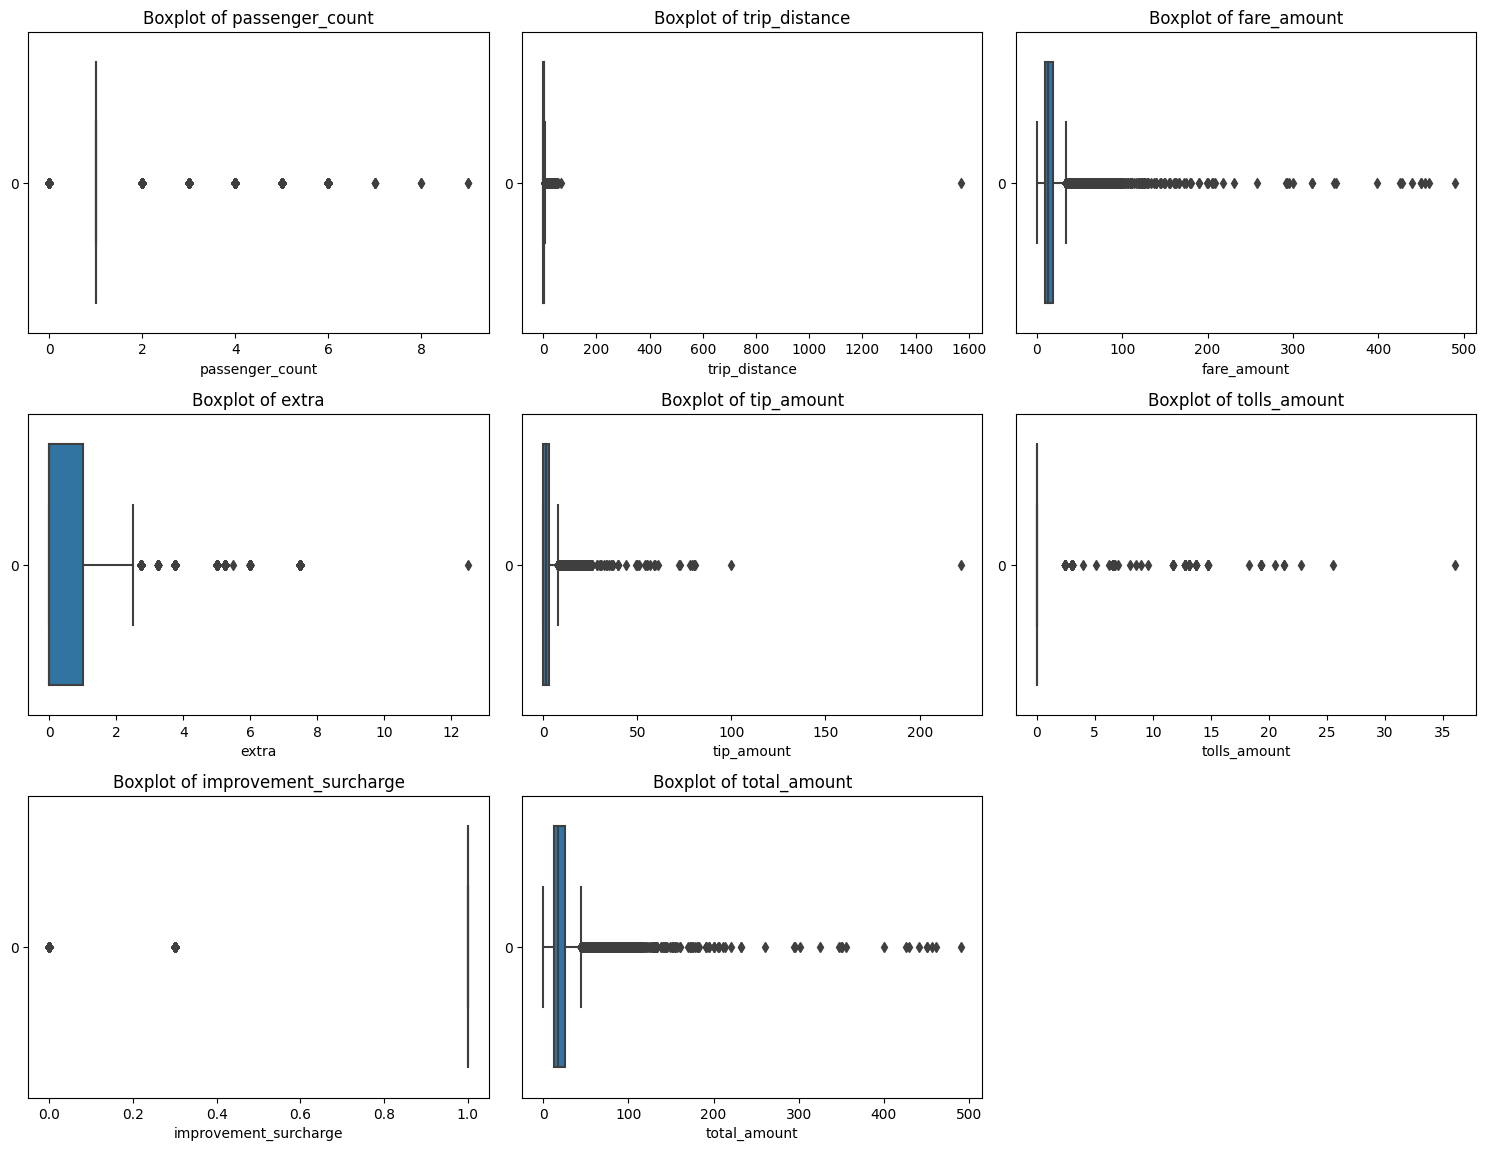

In [90]:
#create a list of numerical columns
numerical_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']
#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

### 2.5.2 Check Outliers on trip_distance

<Axes: >

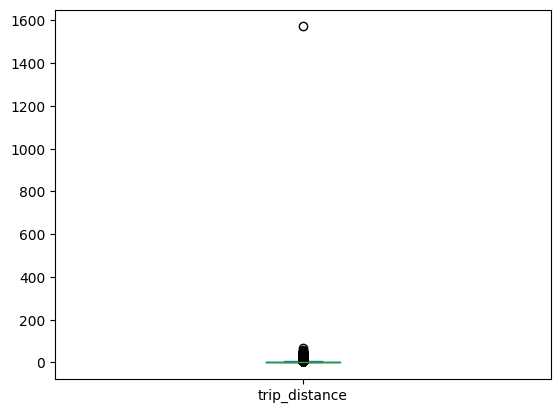

In [91]:
#Check trip_distance distribution by boxplot 
df['trip_distance'].plot(kind='box')

From the boxplot, we can see that there's **1 extreme outlier** which values are way up to about 1600 miles.

In [92]:
#Finding the extreme outlier
df[df['trip_distance'] > 200]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,43.31,1.0,1.0,2.75


Zooming in further we can see the duration between pickup and drop-off are approximately **25 mins** which is **impossible** for a taxi to cover **1571 miles** within that duration. So we would **drop** the data as it is **invalid & unreasonable**.

In [93]:
#Finding the index & dropping the row with outlier
indexTripDistOutlier = df[df['trip_distance'] > 200].index
df.drop(indexTripDistOutlier, inplace=True)

<Axes: >

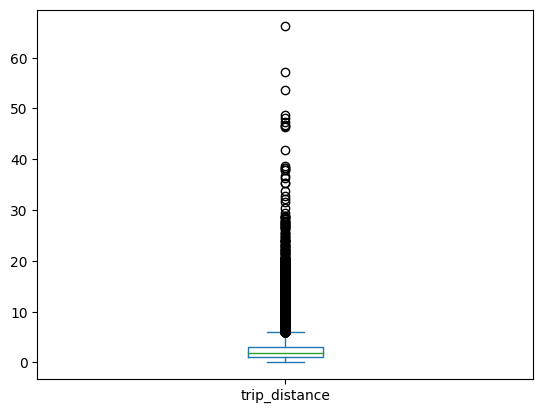

In [94]:
#Check trip_distance distribution by boxplot after removing extreme outlier
df['trip_distance'].plot(kind='box')

After the **extreme outlier are removed**, the distributions are more likely to be **valid**.

<Axes: >

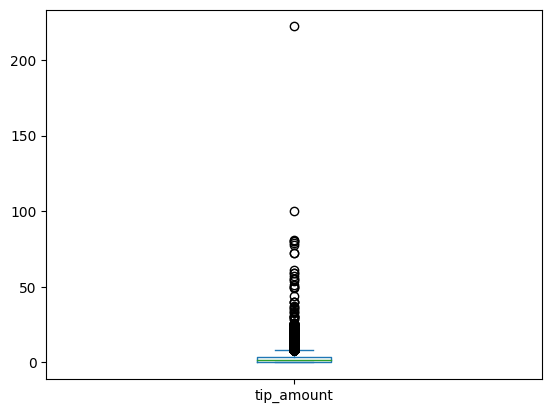

In [95]:
df['tip_amount'].plot(kind='box')

In [96]:
df[df['tip_amount'] > 200]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
50588,2,2023-01-25 18:24:30,2023-01-25 18:28:48,N,1.0,223,223,1,0.76,6.5,2.5,0.5,222.22,0.0,1.0,232.72,1.0,1.0,0.0


## 2.6. Reset Indexing


In [97]:
#Resetting index on df
df.reset_index(inplace=True, drop=True)

---

# 3. Additional Columns: 
To better understand and allowing us to provide deeper context on the data, we will be adding additional columns to original dataframe
- Adding Location column referring to taxi zone code table
- Calculate the duration of each trip using the difference between pickup and drop-off time.
- Identify the month, day of the week, and hour for each trip. Then classify whether the trip is in workday, weekend, or, holiday.
- Calculate the tip percentage using total amount and tip amount.

In [98]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


## 3.1 Merge Zoning Code Lookup 


**Adding ADDITIONAL Dataset: Taxi Zone Dataset**

The pick-up and drop-off locations are populated by numbers ranging from 1 to 263. These numbers corresponds to taxi zone.

• Taxi Zone Look Up Table: a table that contains a list of TLC taxi zone location IDs, location names, and corresponding boroughs of each zone.

Obtained from: https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf


In [99]:
#loading taxi zone lookup table

dfZoneTable = pd.read_csv('/Users/Dwika/My Projects/Modul 2 Purwadhika/_CAPSTONE Project Modul 2/Dataset/Additional Dataset/taxi_zone_lookup.csv')
dfZoneTable

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [100]:
#Join 'PickUpLocation' 
df = df.merge(dfZoneTable[['Borough', 'Zone']], left_on=df['PULocationID'], right_on=dfZoneTable['LocationID'], how='inner')


#Renaming PickUp Zone Columns
df.rename(columns={'Borough':'PU_borough', 'Zone':'PU_zone'}, inplace=True)

#Rearange columns so new zone column are next to PULocationID
df = df[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'PU_borough', 'PU_zone', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge']]

In [101]:
#Join 'DropOffLocation' 
df = df.merge(dfZoneTable[['Borough', 'Zone']], left_on=df['DOLocationID'], right_on=dfZoneTable['LocationID'], how='inner')


#Renaming PickUp Zone Columns
df.rename(columns={'Borough':'DO_borough', 'Zone':'DO_zone'}, inplace=True)

#Rearange columns so new zone column are next to DOLocationID
df = df[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'PU_borough', 'PU_zone', 'DOLocationID','DO_borough', 'DO_zone',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge']]

In [102]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,PU_borough,PU_zone,DOLocationID,DO_borough,DO_zone,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,2.58,14.9,1.00,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-02 18:56:58,2023-01-02 19:14:50,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,3.16,19.8,0.00,0.5,0.00,0.0,1.0,24.05,2.0,1.0,2.75
2,2,2023-01-03 15:28:11,2023-01-03 15:47:47,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,2.55,19.1,0.00,0.5,4.67,0.0,1.0,28.02,1.0,1.0,2.75
3,2,2023-01-03 17:37:14,2023-01-03 17:51:35,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,1.96,15.6,2.50,0.5,0.00,0.0,1.0,22.35,2.0,1.0,2.75
4,1,2023-01-03 19:03:53,2023-01-03 19:17:50,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,2,2.10,13.5,5.25,1.5,0.00,0.0,1.0,20.25,2.0,1.0,2.75


## 3.2 Adding Duration Column

In [103]:
#Duration obtained by substracting lpep_dropoff_datetime - lpep_pickup_datetime
df['trip_duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df['trip_duration']

0       0 days 00:11:01
1       0 days 00:17:52
2       0 days 00:19:36
3       0 days 00:14:21
4       0 days 00:13:57
              ...      
63694   0 days 00:08:48
63695   0 days 00:04:44
63696   0 days 00:20:07
63697   0 days 00:22:19
63698   0 days 00:17:56
Name: trip_duration, Length: 63699, dtype: timedelta64[ns]

## 3.3 Adding Day Name Columns

In [104]:
#Adding Day Name Columns
# df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()

df['pickup_day']=df['lpep_pickup_datetime'].dt.day_name()
df['dropoff_day']=df['lpep_dropoff_datetime'].dt.day_name()
df['pickup_day_no']=df['lpep_pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['lpep_dropoff_datetime'].dt.weekday
df['pickup_hour']=df['lpep_pickup_datetime'].dt.hour
df['dropoff_hour']=df['lpep_dropoff_datetime'].dt.hour

## 3.4 Adding Time of Day Column

In [124]:
#add time of day columns, group by 4 hour intervals
df['time_of_day'] = pd.cut(df['pickup_hour'], bins=[0,4,8,12,16,20,24], labels=['Late Night','Early Morning','Morning','Afternoon','Evening','Night'])

## 3.4 Adding Tips Percentage Column 

In [106]:
#Adding Tips percentage

df['tips_pct'] = round(df['tip_amount']/df['total_amount']*100,2)

## 3.5 Final preview of main dataframe

In [125]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,PU_borough,PU_zone,DOLocationID,DO_borough,DO_zone,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,tips_pct,time_of_day
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,2.58,14.9,1.00,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,0 days 00:11:01,Sunday,Sunday,6,6,0,0,16.67,NaN
1,2,2023-01-02 18:56:58,2023-01-02 19:14:50,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,3.16,19.8,0.00,0.5,0.00,0.0,1.0,24.05,2.0,1.0,2.75,0 days 00:17:52,Monday,Monday,0,0,18,19,0.00,Evening
2,2,2023-01-03 15:28:11,2023-01-03 15:47:47,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,2.55,19.1,0.00,0.5,4.67,0.0,1.0,28.02,1.0,1.0,2.75,0 days 00:19:36,Tuesday,Tuesday,1,1,15,15,16.67,Afternoon
3,2,2023-01-03 17:37:14,2023-01-03 17:51:35,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,1.96,15.6,2.50,0.5,0.00,0.0,1.0,22.35,2.0,1.0,2.75,0 days 00:14:21,Tuesday,Tuesday,1,1,17,17,0.00,Evening
4,1,2023-01-03 19:03:53,2023-01-03 19:17:50,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,2,2.10,13.5,5.25,1.5,0.00,0.0,1.0,20.25,2.0,1.0,2.75,0 days 00:13:57,Tuesday,Tuesday,1,1,19,19,0.00,Evening


---

# 4. Data Analysis

General Insight Questions:
1. How many trips are taken during between a time period?
    - What days are the busiest
    - What hours are busiest?
2. How are people using a taxi service? (Passengers behaviour) ? 
    - What payment types are people using?
    - Are people travelling solo or in groups?
    - Average tips & tips percentage on fare
3. How are the taxi service operating based on areas?
    - Which area are busiest?
    - Which area results in more revenues?

## 4.1 Trips taken between a time period

In [108]:
#Available time period from data
df[['lpep_dropoff_datetime', 'lpep_pickup_datetime']].agg(['max', 'min'])

,lpep_dropoff_datetime,lpep_pickup_datetime
max,2023-02-01 17:27:05,2023-02-01 03:10:05
min,2023-01-01 00:13:26,2023-01-01 00:01:31


The Data available are within 1 month period of **January 1st 2023 - February 2nd 2023**

### 4.1.1 Number of Trips Over Date

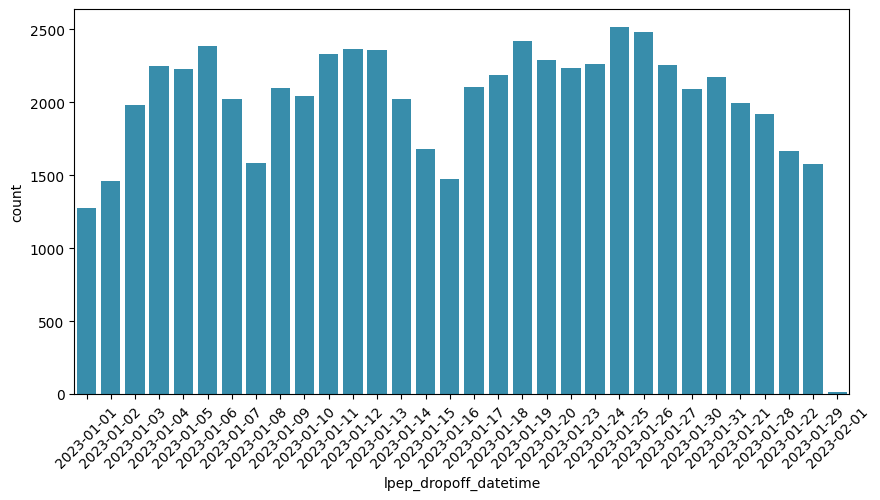

In [109]:
#Plotting barplot for Number of trips over date
plt.figure(figsize=(10,5))
sns.countplot(data=df, x=df['lpep_dropoff_datetime'].dt.date,  palette=['#2596be'])
plt.xticks(rotation=45)
plt.show()

From the number of trips over day, we can see that the total trips made are **fluctuating weekly**. 


### 4.1.2 Number of Trips Over Day

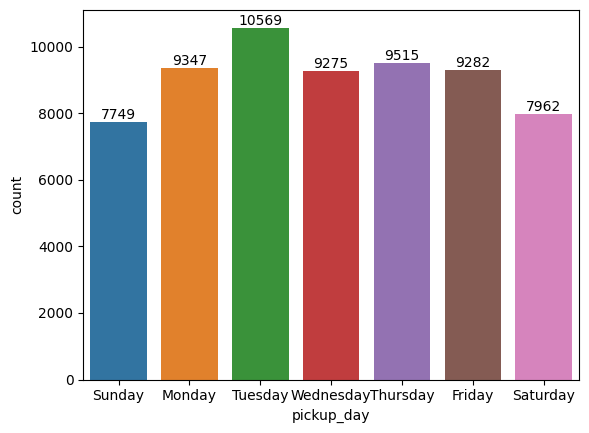

In [110]:
#Plot bar plot of trip count over day_name
pickup_day_barplot = sns.countplot(data=df, x=df['pickup_day'])
#Adding value labels on each bar
for i in pickup_day_barplot.containers:
    pickup_day_barplot.bar_label(i,)

Taxi trips are **peaked on Tuesdays** and distributed almost evenly on other **weekdays**, and also **lower on weekends**.

It's understandable that people are comuting less on weekends and primarily use taxi for commuting to/from offices.

<Axes: xlabel='pickup_day_no'>

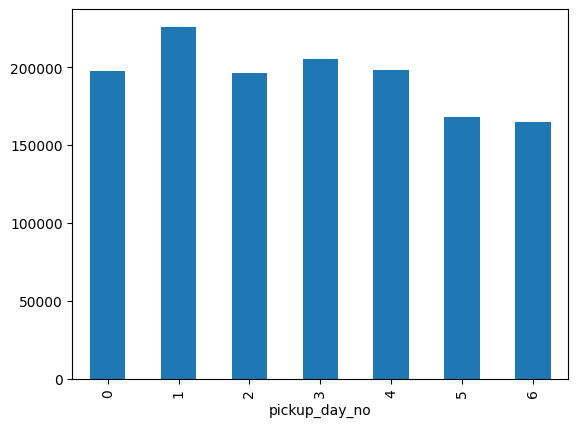

In [111]:
#Total revenues over Days
df.groupby(df['pickup_day_no'])['total_amount'].sum().plot(kind='bar')

Sunday=6
Monday=0

### Trip Counts over Hours

<Axes: xlabel='pickup_hour', ylabel='count'>

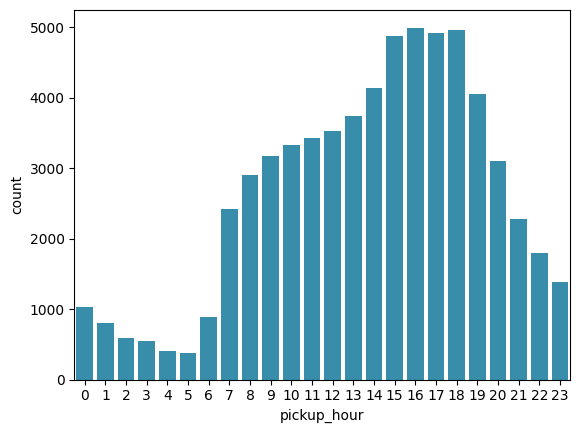

In [112]:
sns.countplot(data=df, x=df['pickup_hour'], palette=['#2596be'])

The number of trips are peaked between **3PM - 6 PM**, it could be assumed that people are using taxi for commuting from office to home.

> It can be the base of recommendation for taxi companies to dispatch **higher number of taxis during peak hours (3PM-6PM)**.

## 4.2 Passengers Behaviour

In general we wold like to see how passengers are using taxi services. From the data available, we can take a deeper look on:
 - Trip count over number of passengers
 - Preferred payment options used 
 - Tip Amount 

### 4.2.1 Trip Count over Number of Passengers 

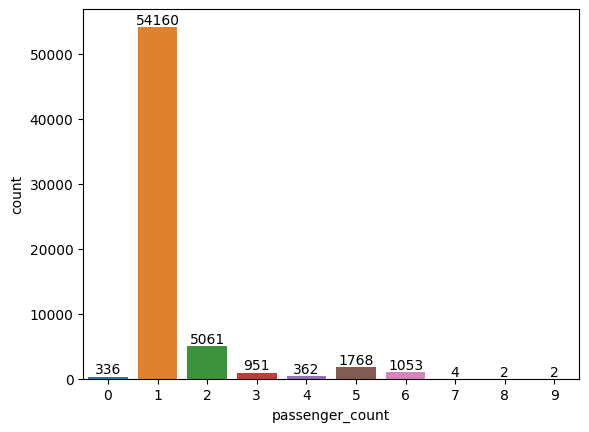

In [113]:
#Plotting barplot for each number of passengers
pcount_plot = sns.countplot(data=df, x=df['passenger_count'])
#Adding value labels on each bar
for i in pcount_plot.containers:
    pcount_plot.bar_label(i,)

From the chart above we can see that taxi passengers prefer to travel solo.

 ***Notes on Passenger Count***

There are 336 trips where passenger counts are 0, there are several assumptions that could be made:
- Trips are cancelled by passenger / driver
- People are using taxi as item delivery
- Unrecorded data by LPEP system (error by system)
- Human error as the number of passengers are inputted manually by the driver

### 4.2.1 By Payment Type

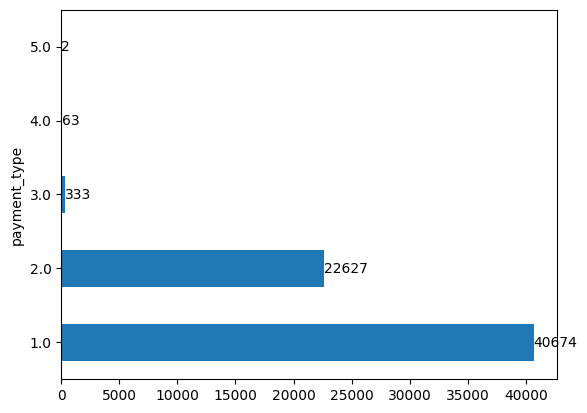

In [114]:
#Plotting bar chart of trip count by payment type
payment_type_barplot = df['payment_type'].value_counts().plot(kind='barh')

for i in payment_type_barplot.containers:
    payment_type_barplot.bar_label(i,)


| code | 'payment_type' 
|---|---|
| 1 | Credit card 
2 | Cash 
3 | No charge 
4 | Dispute
5 | Unknown 
6 | Voided trip



**Credit card** are most preferred payment options when using taxi services.

> It could be recommended that taxi companies could leverage this by partnering with credit card companies, and come up with promotion program such as "taxi miles" to reward their customers for using taxi services.

*Further analysis and data could be done if there are information about Credit Card banks in used*

<Axes: ylabel='count'>

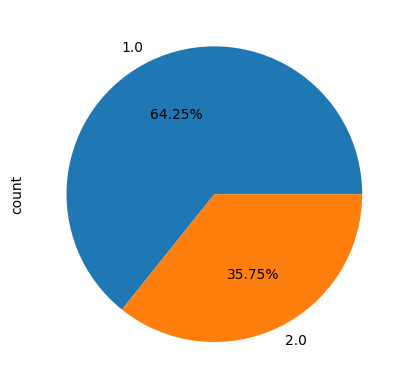

In [115]:
#Plotting pie chart of payment types
df[df['payment_type'] < 3]['payment_type'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [116]:
#Payment Type over borough
df.groupby(df['PU_borough'])['payment_type'].value_counts()

PU_borough     payment_type
Bronx          1.0               467
               2.0               433
               3.0                11
Brooklyn       1.0              5806
               2.0              2143
               3.0                34
               4.0                10
               5.0                 1
EWR            1.0                 1
Manhattan      1.0             25952
               2.0             11265
               3.0               151
               4.0                35
Queens         2.0              8712
               1.0              8316
               3.0               135
               4.0                16
               5.0                 1
Staten Island  1.0                 8
               2.0                 4
Unknown        1.0               124
               2.0                70
               3.0                 2
               4.0                 2
Name: count, dtype: int64

<Axes: ylabel='PU_borough,payment_type'>

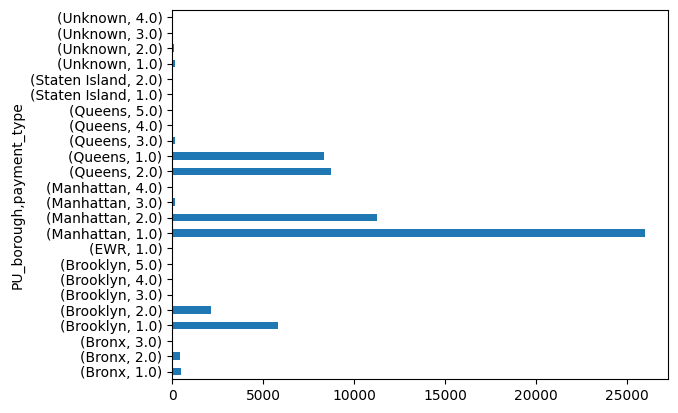

In [117]:
#Payment Type over borough
df.groupby(df['PU_borough'])['payment_type'].value_counts().plot(kind='barh')

## 4.3 Taxi Operations by Areas

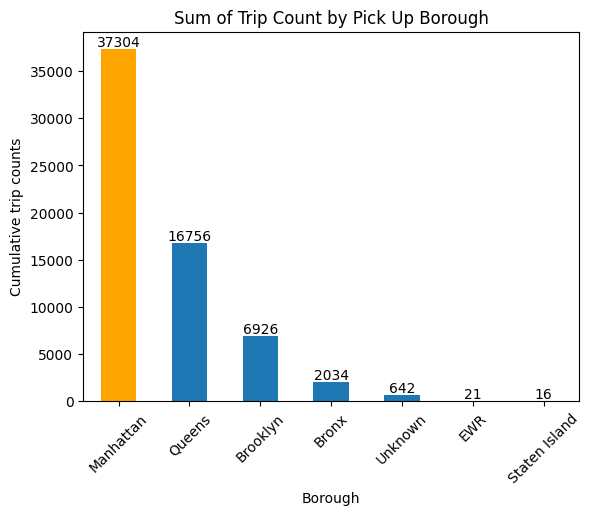

In [118]:
#Create Bar plot for trip Count over Borough
tripcount_borough_barplot = df['DO_borough'].value_counts().plot(kind='bar')

plt.xlabel("Borough")
plt.ylabel("Cumulative trip counts")
plt.title("Sum of Trip Count by Pick Up Borough")
plt.xticks(rotation=45)
#Total 
for i in tripcount_borough_barplot.containers:
    tripcount_borough_barplot.bar_label(i,)

# Get the patches and color the tallest
patch_h = [patch.get_height() for patch in tripcount_borough_barplot.patches]   
idx_tallest = np.argmax(patch_h)   
tripcount_borough_barplot.patches[idx_tallest].set_facecolor('orange') 


Most pickup of taxi trips are done within **Manhattan** Borough. 

It's understandable as Manhattan are considered to be the 'heart of NYC', it's geographically smallest and **most densely populated borough**; is the symbol of New York City, as home to most of the city's skyscrapers and prominent landmarks, including Times Square and Central Park. *(Source: Wikipedia)*

For added context, here's the general information on NYC boroughs:


<img src="/Users/Dwika/My Projects/Modul 2 Purwadhika/_CAPSTONE Project Modul 2/NYC Borough.png" width="50%" height="50%">

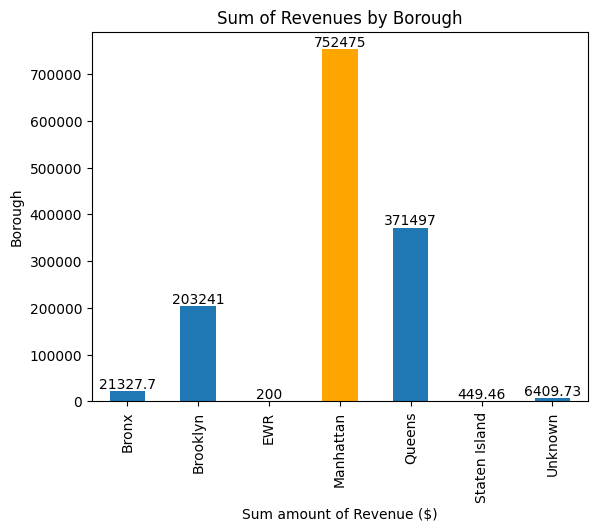

In [119]:
#Total revenues over Boroughs
PU_borough_barplot =  df.groupby(df['PU_borough'])['total_amount'].sum().plot(kind='bar')
plt.xlabel("Sum amount of Revenue ($)")
plt.ylabel("Borough")
plt.title("Sum of Revenues by Borough")
#Total 
for i in PU_borough_barplot.containers:
    PU_borough_barplot.bar_label(i,)

# Get the patches and color the tallest
patch_h = [patch.get_height() for patch in PU_borough_barplot.patches]   
idx_tallest = np.argmax(patch_h)   
PU_borough_barplot.patches[idx_tallest].set_facecolor('orange') 

plt.show()

In [120]:
#Descriptive stats of total fares in PickUp Borough
df.groupby(df['PU_borough'])['total_amount'].agg(['median','min','max','sum'])

,median,min,max,sum
PU_borough,,,,
Bronx,19.00,0.0,97.28,21327.70
Brooklyn,20.88,0.0,426.00,203240.86
EWR,200.00,200.0,200.00,200.00
Manhattan,17.10,0.0,201.00,752474.74
Queens,17.00,0.0,491.00,371497.33
Staten Island,29.50,11.2,110.25,449.46
Unknown,21.25,0.0,355.20,6409.73


In [121]:
df.groupby(df['DO_borough'])['total_amount'].agg(['median','min','max','sum'])

,median,min,max,sum
DO_borough,,,,
Bronx,20.355,0.00,120.90,47700.29
Brooklyn,19.200,0.00,426.00,164233.85
EWR,140.300,80.25,181.74,2907.51
Manhattan,17.250,0.00,201.00,752094.14
Queens,16.800,0.00,491.00,363147.25
Staten Island,30.575,4.25,110.25,684.06
Unknown,25.105,0.00,355.20,24832.72


In [122]:
df['PU_borough']

0            Manhattan
1            Manhattan
2            Manhattan
3            Manhattan
4            Manhattan
             ...      
63694    Staten Island
63695    Staten Island
63696    Staten Island
63697    Staten Island
63698    Staten Island
Name: PU_borough, Length: 63699, dtype: object

Manhattan are generating the highest sum revenue of **$752,475** in a period of January 2023 with an average total trip fare of **$17,10** .

In [123]:
#Plot Map of Manhattan
tlcMap[tlcMap['borough'] == 'Manhattan'].plot()


NameError: name 'tlcMap' is not defined

In [ ]:
gpd.read_file('/Users/Dwika/My Projects/Modul 2 Purwadhika/_CAPSTONE Project Modul 2/Raw Dataset/geo_export_421a6cfb-b228-4bc0-8571-0ab6d41807ad.csv')

,X,Y,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,-74.1767785471836,40.6895151478039,EWR,1,1,0.0007823067885,0.116357453189,Newark Airport,None
1,-73.826141187548,40.6257250653606,Queens,2,2,0.00486634037837,0.43346966679,Jamaica Bay,None
2,-73.8494797117996,40.8658720486048,Bronx,3,3,0.000314414156821,0.0843411059012,Allerton/Pelham Gardens,None
3,-73.9770238531481,40.7241508237094,Manhattan,4,4,0.000111871946192,0.0435665270921,Alphabet City,None
4,-74.1899382186973,40.5503388087419,Staten Island,5,5,0.000497957489363,0.0921464898574,Arden Heights,None
...,...,...,...,...,...,...,...,...,...
258,-73.9591084943837,40.7109802819405,Brooklyn,256,256,0.000168611097013,0.0679149669603,Williamsburg (South Side),None
259,-73.8563997211766,40.8990800823679,Bronx,259,259,0.000394552487366,0.126750305191,Woodlawn/Wakefield,None
260,-73.9037149992412,40.7467908284139,Queens,260,260,0.000422345326907,0.133514154636,Woodside,None
261,-74.0129195637957,40.7089752027539,Manhattan,261,261,3.43423231652e-05,0.0271204563616,World Trade Center,None


<Axes: ylabel='PU_zone'>

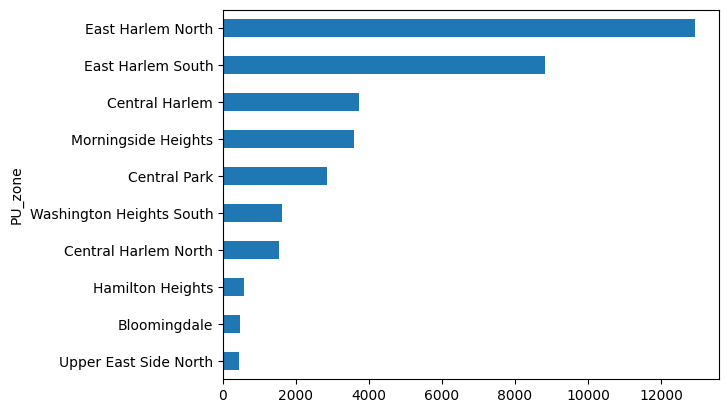

In [ ]:
df[df['PU_borough'] == 'Manhattan']['PU_zone'].value_counts(ascending=True).tail(10).plot(kind='barh')

<Axes: ylabel='DO_zone'>

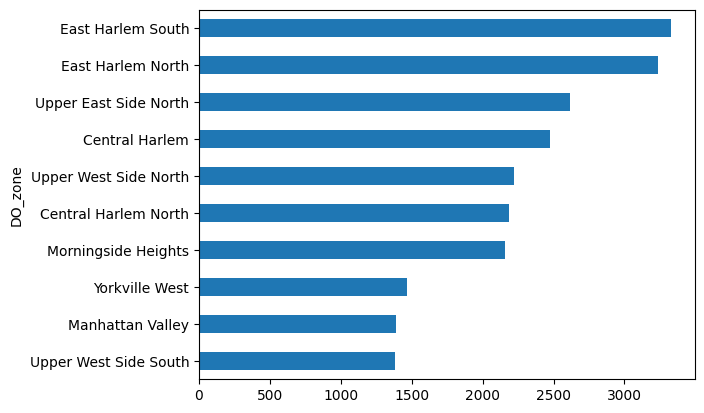

In [ ]:
df[df['PU_borough'] == 'Manhattan']['DO_zone'].value_counts(ascending=True).tail(10).plot(kind='barh')

In [ ]:

# Create a cross-tabulation between Pickup Location (PULocationID) and Dropoff Location (DOLocationID)
cross_tab = pd.crosstab(df['PU_borough'], df['DO_borough'])

# Optionally, you can add margins to get row and column totals
cross_tab_with_totals = pd.crosstab(df['PU_borough'], df['DO_borough'], margins=True, margins_name='Total')

cross_tab_with_totals

DO_borough,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown,Total
PU_borough,,,,,,,,
Bronx,608,16,0,223,34,0,30,911
Brooklyn,36,6184,7,1325,342,2,98,7994
EWR,0,0,0,0,0,0,1,1
Manhattan,1349,230,7,34928,767,3,119,37403
Queens,40,471,6,827,15596,1,239,17180
Staten Island,0,2,0,0,1,9,0,12
Unknown,1,23,1,1,16,1,155,198
Total,2034,6926,21,37304,16756,16,642,63699


<Axes: xlabel='DO_borough', ylabel='PU_borough'>

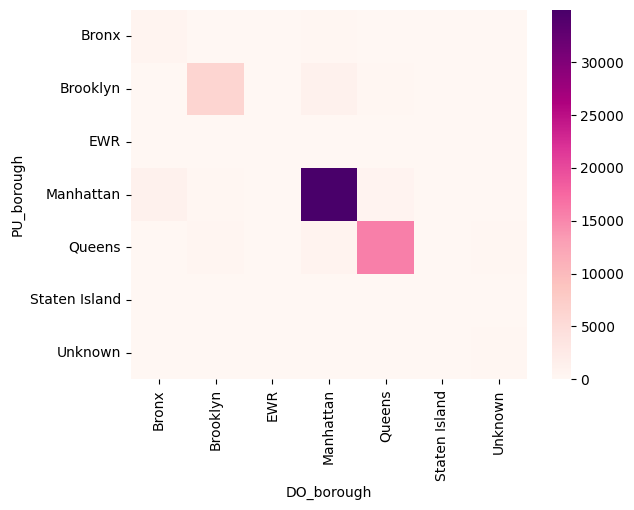

In [ ]:
sns.heatmap(data=cross_tab, cmap='RdPu')

### 3.x.x Interborough or Within Borough Trips

In [ ]:
#Group by PU_borough and DO_borough
df.groupby(df['PU_borough'])[['PU_borough', 'DO_borough']].count()

,PU_borough,DO_borough
PU_borough,,
Bronx,911,911
Brooklyn,7994,7994
EWR,1,1
Manhattan,37403,37403
Queens,17180,17180
Staten Island,12,12
Unknown,198,198


# 4.x Geographical Views 

In [1]:
import geopandas as gpd

In [ ]:
tlcMap = gpd.read_file('/Users/Dwika/My Projects/Modul 2 Purwadhika/_CAPSTONE Project Modul 2/Raw Dataset/NYC Taxi Zones/geo_export_421a6cfb-b228-4bc0-8571-0ab6d41807ad.shp')

<Axes: >

<Figure size 1500x1500 with 0 Axes>

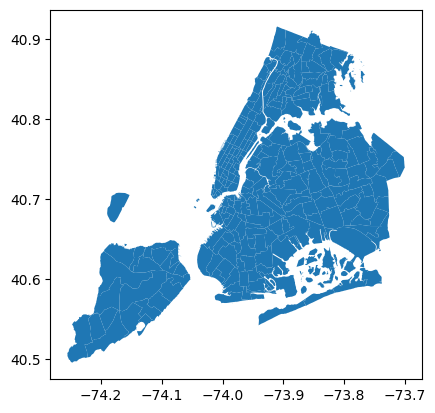

In [ ]:
#Plotting NYC Map Plot from shapefile
tlcMap.plot()

In [ ]:
df.groupby(df['PU_zone']).count()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,PU_borough,DOLocationID,DO_borough,DO_zone,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,day_of_week,tips_pct,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
PU_zone,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Allerton/Pelham Gardens,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Astoria,1817,1817,1817,1817,1817,1817,1817,1817,1817,1812,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817,1817,1814,1817,1817,1817,1817,1817,1817,1817,1817
Auburndale,11,11,11,11,11,11,11,11,11,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Baisley Park,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,23,25,25,25,25,25,25,25,25
Bath Beach,6,6,6,6,6,6,6,6,6,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodlawn/Wakefield,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Woodside,1382,1382,1382,1382,1382,1382,1382,1382,1382,1377,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382
World Trade Center,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_PU_zone_count = pd.DataFrame(df.groupby(df['PU_zone']).count()['lpep_pickup_datetime'])

In [ ]:
df_PU_zone_count.reset_index(inplace=True)

In [ ]:
df_PU_zone_count

,PU_zone,lpep_pickup_datetime
0,Allerton/Pelham Gardens,6
1,Astoria,1817
2,Auburndale,11
3,Baisley Park,25
4,Bath Beach,6
...,...,...
215,Woodlawn/Wakefield,5
216,Woodside,1382
217,World Trade Center,1
218,Yorkville East,8


In [ ]:
tlcMap

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,Brooklyn,256.0,256.0,0.000169,0.067915,Williamsburg (South Side),"POLYGON ((-73.95834 40.71331, -73.95681 40.712..."
259,Bronx,259.0,259.0,0.000395,0.126750,Woodlawn/Wakefield,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
260,Queens,260.0,260.0,0.000422,0.133514,Woodside,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
261,Manhattan,261.0,261.0,0.000034,0.027120,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."


In [ ]:
df_PU_zone_map = df_PU_zone_count.merge(tlcMap[['geometry']], left_on=df_PU_zone_count['PU_zone'], right_on=tlcMap['zone'], how='inner')

In [ ]:
df_PU_zone_map.drop(columns=['key_0'], inplace=True)

In [ ]:
df_PU_zone_map['trip_counts']= df_PU_zone_map['lpep_pickup_datetime']

In [ ]:
df_PU_zone_map.drop(columns='lpep_pickup_datetime', inplace=True)

In [ ]:
df_PU_zone_map

,PU_zone,geometry,trip_counts
0,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",6
1,Astoria,"POLYGON ((-73.90414 40.76752, -73.90325 40.767...",1817
2,Auburndale,"POLYGON ((-73.78502 40.76104, -73.78486 40.760...",11
3,Baisley Park,"POLYGON ((-73.78327 40.68999, -73.78234 40.688...",25
4,Bath Beach,"POLYGON ((-74.00110 40.60303, -74.00032 40.602...",6
...,...,...,...
215,Woodlawn/Wakefield,"POLYGON ((-73.85107 40.91037, -73.85207 40.909...",5
216,Woodside,"POLYGON ((-73.90175 40.76078, -73.90147 40.759...",1382
217,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704...",1
218,Yorkville East,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...",8


In [ ]:

import matplotlib.pyplot as plt #if using matplotlib
import plotly.express as px #if using plotly


# 5. Conclusion & Key Findings

### **Trip Counts by Time Period**

Total number of trips taken in NYC are fluctuating on a daily basis and peaked on **Tuesdays** and lower on **Weekends**

- Overall trip counts on February 2023 : xx trips
- The number of trips are peaked between **3PM - 6 PM**
- Average daily 
- Average daily trips
- 
### **Passenger Behaviour**
- Majority of people (xx%) are travelling solo when using taxi service
- Credit Card are the most popular Type of payment
- people generally tips 15-17% of the total fare

### 3. Taxi Trip Activities by Area
- Taxi trips with the highest trip counts are in **Manhattan** borough

# 6. Recommendation

*Recalling from the goal statement:*


1. How to optimize revenues and streamlining operations?
    - **Anticipating Peak Hours** by dispatching more taxi units 1-2 hours before **peak hours (3PM - 6PM)** to anticipate rapid increasing demand
    
    - **Enhance Weekend Service**, Since weekends show lower trip counts, taxi companies can focus on marketing efforts to increase weekend ridership. This could involve special promotions or partnerships with event venues or restaurants to encourage weekend travel.


2. How to to better serve customers by undertanding their behaviours?  
    - **Partners with Banks / Credit Card issuers** and create a loyalty program such as "Taxi Miles" to reward the customers and prolong customer lifetime value
    
    - **Solo Travel Packages** Recognizing that the majority of passengers travel solo, taxi companies can create marketing campaigns and pricing structures tailored to solo travelers. Offering incentives for solo riders or promoting shared rides could also be a strategy.
    - **Tip-Based Incentives for Drivers**, Since customers generally tip 15-17% of the total fare, taxi drivers can consider providing excellent service to encourage higher tips. Companies can also run driver incentive programs based on customer ratings and tips.
    - **Engage with customers** through surveys or feedback mechanisms to understand their preferences and needs better. Use this feedback to tailor services and improve customer satisfaction.

3. How to optimize the distribution of drivers?
    - **Focusing operations** in high demand areas of **Manhattan**
    - **Increase service quality** in **Brooklynn** and **Queens** to grab more customers as potential revenue generator after Manhattan

tbd- Diversify Services Depending on the data, taxi companies may consider diversifying their services. For example, if there are specific pickup/drop-off locations or routes that are consistently popular, they can offer specialized services or promotions for those routes.




***Additional Recommendation***